In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [15]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [16]:
from Scripts import simulation_CLI as cleo
identity = DM.Identity(DM.energy_basis(4))

In [26]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [53]:
for sim_index in twoQdmsgreedy:
  # Loop through each time_step in the sim_index
    for time_step in sim_index:
        concurrence = measure.concurrence_of_every_pair_dict(time_step)
    print(concurrence)

{(0, 1): (-0.32826925069093704+3.2081326484245665e-09j), (0, 2): (-0.3312130560314972+3.314783780794528e-09j), (0, 3): (-0.3312130262911094+5.5533875276125855e-09j), (0, 4): (-0.3469176571816206+1.5836930655765968e-09j), (0, 5): (-0.3439213242381811+4.41902203718314e-09j), (0, 6): (-0.3312130851172924+3.840086026940526e-09j), (0, 7): (-0.3312130553357374+5.700447225365224e-09j), (1, 2): (-0.34781122088712546+6.632007387707972e-09j), (1, 3): (-0.3478112209741181+4.220952032341074e-09j), (1, 4): (-0.28400737047195435+7.243610156137947e-09j), (1, 5): (-0.2891055643558502+3.948382509832982e-09j), (1, 6): (-0.3478112209208881+5.03709740584668e-09j), (1, 7): (-0.3478112211530979+5.016444593053393e-09j), (2, 3): (-0.31999997277274517+3.3740688021310916e-09j), (2, 4): (-0.3618463267555724+6.113168193877527e-09j), (2, 5): (-0.3418591008323699+3.871274412148296e-09j), (2, 6): (-0.3200000187504872+7.903818044496802e-09j), (2, 7): (-0.3200000141923116+6.405273200726924e-09j), (3, 4): (-0.361846326

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/colors.py:743: ComplexWarning: Casting complex values to real discards the imaginary part
  xa = xa.astype(int)
/opt/anaconda3/lib/python3.11/site-packages/networkx/convert_matrix.py:995: ComplexWarning: Casting complex values to real discards the imaginary part
  A[i, j] = wts
/opt/anaconda3/lib/python3.11/site-packages/networkx/convert_matrix.py:997: ComplexWarning: Casting complex values to real discards the imaginary part
  A[j, i] = wts


TypeError: '<' not supported between instances of 'complex' and 'complex'

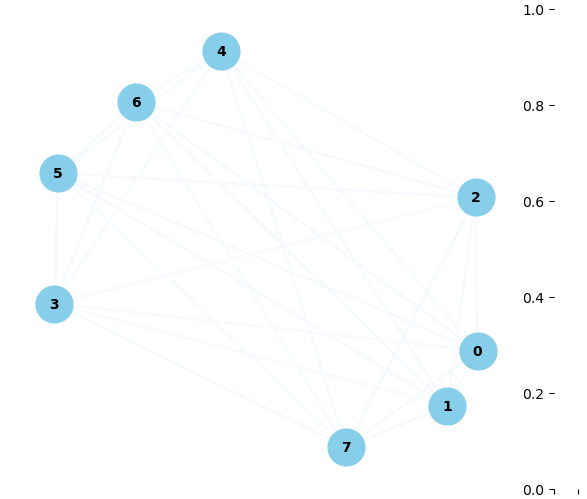

In [52]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Loop through each sim_index
for sim_index in twoQdmsgreedy:
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        concurrence = measure.concurrence_of_every_pair_dict(time_step)
    
        # Create a graph object
        G = nx.Graph()
        
        # Add edges from the dictionary
        for edge, weight in concurrence.items():
            G.add_edge(*edge, weight=weight)
        
        # Normalize edge weights
        edge_weights = [weight for _, _, weight in G.edges(data='weight')]
        norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
        
        # Create a colormap for edge colors
        cmap = plt.cm.Blues
        
        # Add edges with normalized weights and colored edges
        for u, v, data in G.edges(data=True):
            norm_weight = norm(data['weight'])
            G[u][v]['norm_weight'] = norm_weight
            G[u][v]['color'] = cmap(norm_weight)
        
        # Append the graph to the list of networks for this sim_index
        networks.append(G)
    
    # Now plot all networks for this sim_index
    for i, G in enumerate(networks):
        # Draw the graph
        pos = nx.spring_layout(G)  # Positions for all nodes
        nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold',
                edge_color=[data['color'] for _, _, data in G.edges(data=True)], width=2.0)
        
        # Create a ScalarMappable for colormap and normalize
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca())  # Use current axis (gca)
        cbar.set_label('Edge Weight')
        
        plt.title(f"Graph from Greedy Dictionary with Normalized Edge Weights (Time Step {i})")
        plt.show()

In [92]:
for sim_index in twoQdmsrandom:
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information_random = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information_random.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)*10000
        meann=np.mean(listr)*10000    
        # printing results
        #print(min(listr),"mean:",meann , "std:",std)
    

-8.512223326206936e-08 mean: -0.0005607385028527645 std: 0.0003806490376183281
-1.1246936137965236e-07 mean: 13.721843509802751 std: 71.30201851429422
-2.0071771555940643e-07 mean: 16.111307881241693 std: 44.48557329421488
-1.1701965019206284e-07 mean: 11.923874981278576 std: 26.419048386107978
4.100437785647948e-05 mean: 10.750612671891954 std: 13.342529669657061
6.782934094817783e-05 mean: 8.307847230140663 std: 8.454816196948432
2.2675604076427547e-05 mean: 5.908645799914522 std: 5.086541776502167
5.8138478020719475e-05 mean: 5.668259513795951 std: 6.227015178025066
1.0851073095174968e-05 mean: 5.31112189667409 std: 8.171401925193997
2.474295295606943e-05 mean: 4.680888291136204 std: 5.672637127753273
8.561196559231377e-06 mean: 4.640154987822458 std: 6.171351279844693
1.1705493289770885e-05 mean: 4.374338131338251 std: 4.334469729367119
3.4957280516945133e-06 mean: 4.3895538300314785 std: 5.337821800547581
7.988454763463437e-06 mean: 3.8943501283942936 std: 4.427594076417593
1.5766

In [81]:
for sim_index in twoQdmsgreedy:
    # Create an empty list to store networks for this sim_index
    networks = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)*10000
        meann=np.mean(listr)*10000    
        # printing results
        #print(max(listr)*10000,"mean:",meann , "std:",std)

In [87]:
initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
initial_pops_thermal = [.225, .225, .225, .225, .225, .225, .225, .225]
system = DM.n_thermal_qbits(initial_pops)
system_thermal = DM.n_thermal_qbits(initial_pops_thermal)
(measure.entropy(system_thermal)-measure.entropy(system))*(1/8)
    

0.01116170375350134

In [85]:
import numpy as np

# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in twoQdmsrandom:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information_random = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information_random.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)*100
        mean = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([mean, std])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Print the array
#print(mean_std_array[0])

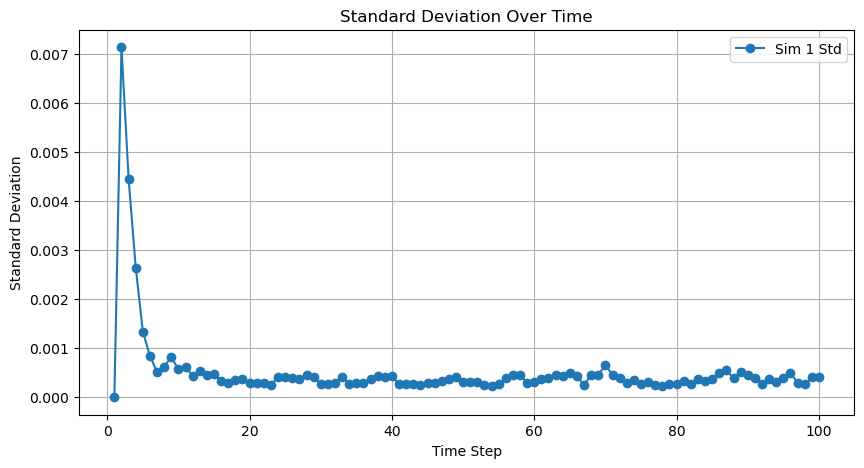

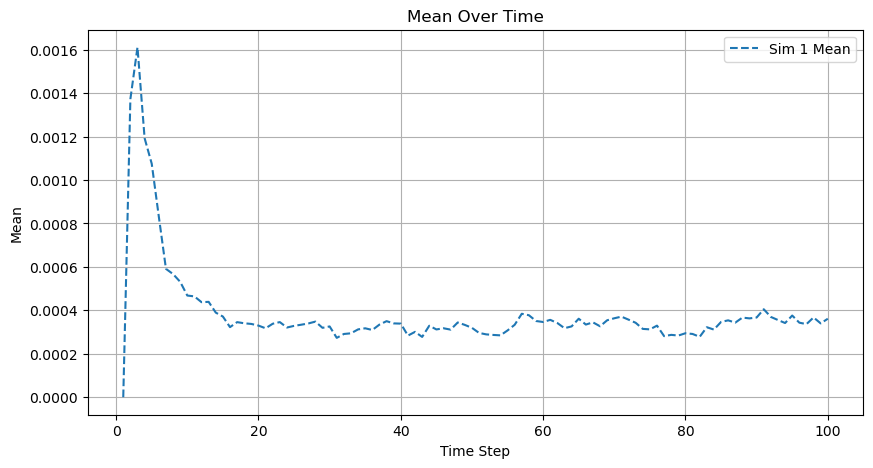

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in twoQdmsrandom:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information_random = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information_random.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)
        mean = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([mean, std])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Extract standard deviation and mean values for each simulation
stds = mean_std_array[:, :, 1]
means = mean_std_array[:, :, 0]

# Create x-axis values (time steps)
time_steps = np.arange(1, stds.shape[1] + 1)

# Plot standard deviation for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(stds)):
    plt.plot(time_steps, stds[sim_idx], '-o', label=f'Sim {sim_idx + 1} Std')

plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot mean for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(means)):
    plt.plot(time_steps, means[sim_idx], '--', label=f'Sim {sim_idx + 1} Mean')

plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Over Time')
plt.legend()
plt.grid(True)
plt.show()


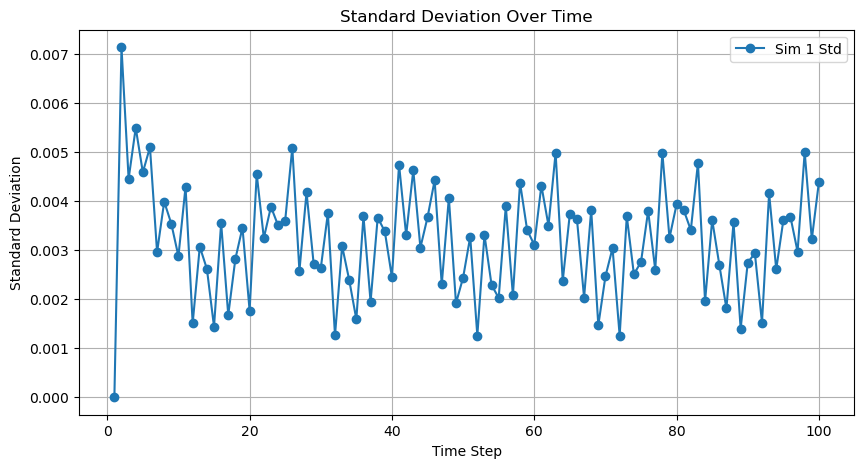

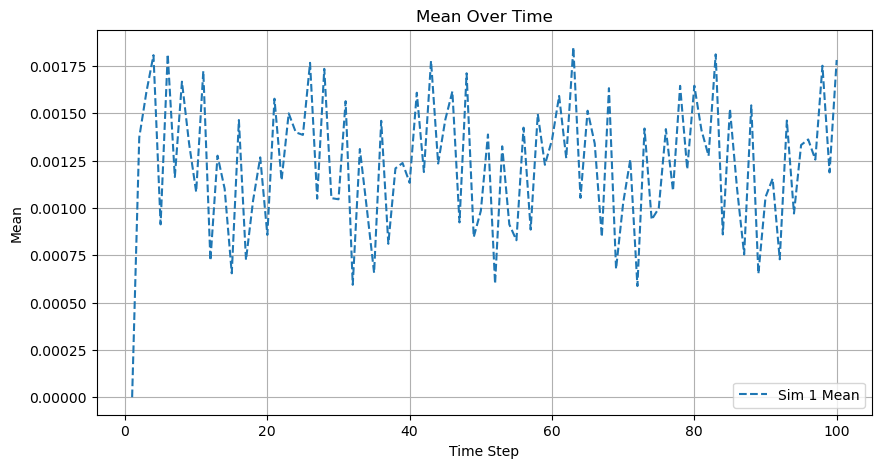

In [88]:
# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in twoQdmsgreedy:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        mutual_information = measure.mutual_information_of_every_pair_dict(time_step)
        # declaring an empty list
        listr = []
        # appending all the values in the list
        for value in mutual_information.values():
            listr.append(value)
        # calculating standard deviation using np.std
        std = np.std(listr)
        mean = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([mean, std])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Extract standard deviation and mean values for each simulation
stds = mean_std_array[:, :, 1]
means = mean_std_array[:, :, 0]

# Create x-axis values (time steps)
time_steps = np.arange(1, stds.shape[1] + 1)

# Plot standard deviation for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(stds)):
    plt.plot(time_steps, stds[sim_idx], '-o', label=f'Sim {sim_idx + 1} Std')

plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot mean for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(means)):
    plt.plot(time_steps, means[sim_idx], '--', label=f'Sim {sim_idx + 1} Mean')

plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Over Time')
plt.legend()
plt.grid(True)
plt.show()

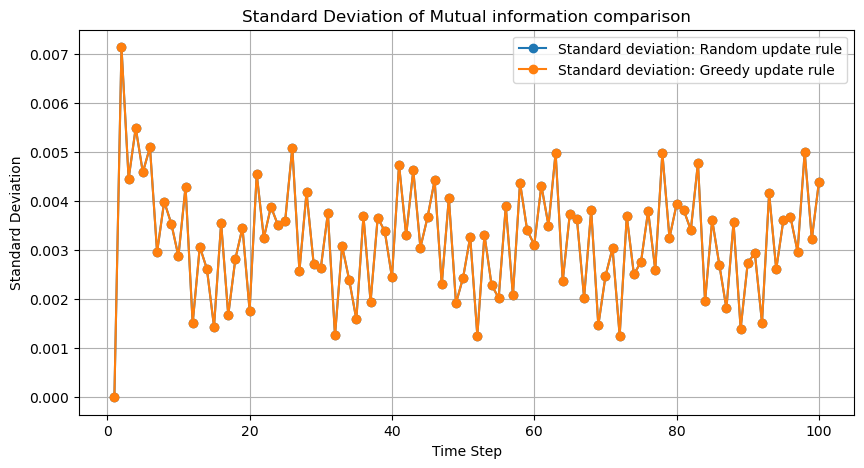

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for stds1 and stds2 (replace these with your actual data)
time_steps = np.arange(1, 101)
stds1 =stds[0]
stds2 = stds_first_sim 

# Plot stds1 and stds2 on the same plot
plt.figure(figsize=(10, 5))
plt.plot(time_steps, stds1, '-o', label='Standard deviation: Random update rule')
plt.plot(time_steps, stds2, '-o', label='Standard deviation: Greedy update rule')
plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Mutual information comparison')
plt.legend()
plt.grid(True)
filename = f"SD_different_update_rules.png"
plt.savefig(filename)
plt.show()



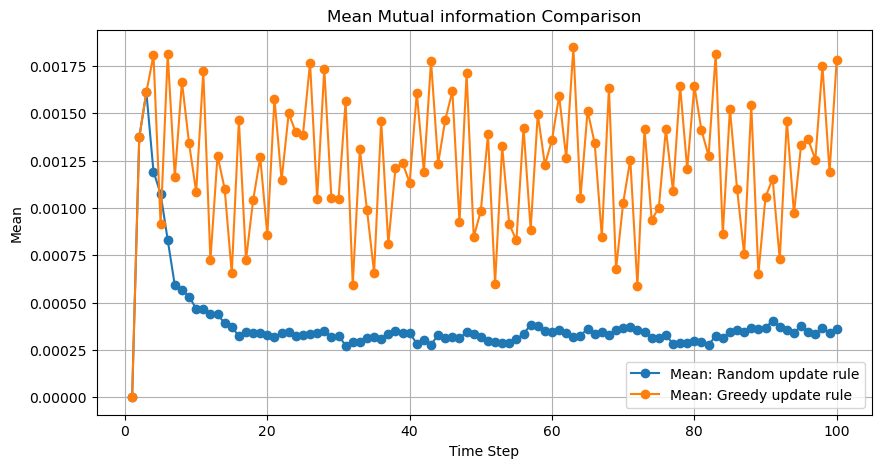

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for stds1 and stds2 (replace these with your actual data)
time_steps = np.arange(1, 101)
means1 = means[0]
means2 = means_first_sim 

# Plot stds1 and stds2 on the same plot
plt.figure(figsize=(10, 5))
plt.plot(time_steps, means1, '-o', label='Mean: Random update rule')
plt.plot(time_steps, means2, '-o', label='Mean: Greedy update rule')
plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Mutual information Comparison')
plt.legend()
plt.grid(True)
# Save the figure with filename indicating time_step and sim_index
filename = f"MI_different_update_rules.png"
plt.savefig(filename)
plt.show()